In [27]:
# Make list of all foto's 
import os, fnmatch, facemorpher
from pyagender import PyAgender
import cv2
import face_recognition

def find(name, path):
    for root, dirs, files in os.walk(path):
        if name in dirs:
            return os.path.join(root, name)
        
def find2(pattern, path):
    result = []
    for root, dirs, files in os.walk(path):
        for name in files:
            if fnmatch.fnmatch(name, pattern):
                result.append(os.path.join(root, name))
    return result
path = "/Users/ellen/Documents/Twente/Q2/Introduction to biometrics/Siblings2fotos/"
foto_1 = find2('*_1.png', path)
foto_2 = []
for x in foto_1:
    z = x.replace("_1.png", ".png")
    foto_2.append(z)

/Users/ellen/Documents/Twente/Q2/Introduction to biometrics/Siblings2fotos/181_24_1.png
/Users/ellen/Documents/Twente/Q2/Introduction to biometrics/Morph/CLEB/Morph_10_20.png


/opt/anaconda3/envs/ML/lib/python3.7/site-packages/facemorpher/plotter.py:71: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  p = plt.subplot(self.rows, self.cols, self.plot_counter)


output/frame001.png saved
output/frame002.png saved
output/frame003.png saved
output/frame004.png saved
output/frame005.png saved
output/frame006.png saved
output/frame007.png saved
output/frame008.png saved
output/frame009.png saved
output/frame010.png saved
output/frame011.png saved
output/frame012.png saved
output/frame013.png saved
output/frame014.png saved
output/frame015.png saved
output/frame016.png saved
output/frame017.png saved
output/frame018.png saved


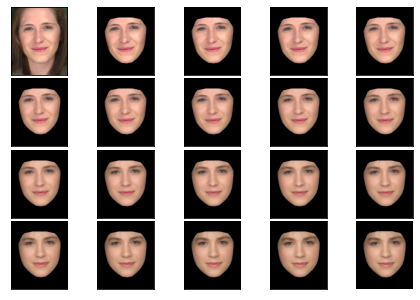

error: OpenCV(3.4.11) /private/var/folders/nz/vv4_9tw56nv9k3tkvyszvwg80000gn/T/pip-req-build-xz1ykgu4/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [29]:
# Morph alle foto's van foto_1 met een leeftijdsgroep
agender = PyAgender() 

def morphing(orginele_foto, morph_foto):
    faces = agender.detect_genders_ages(cv2.imread(orginele_foto))
    original_age = faces[0]['age']
    pictures = [orginele_foto, morph_foto]
    facemorpher.morpher(pictures, plot=True, out_frames='output')
    morph_out = x + "/output/frame009.png"
    faces = agender.detect_genders_ages(cv2.imread(morph_out))
    Morphing_age = faces[0]['age']
    actual_age = orginele_foto.split("_")[1]
    return Morphing_age, original_age, actual_age


def compare_img(Known, Test):
    known_image = face_recognition.load_image_file(Known)
    face_encoding = face_recognition.face_encodings(known_image)[0]
    known_encodings = [face_encoding]
    image_to_test = face_recognition.load_image_file(Test)
    image_to_test_encoding = face_recognition.face_encodings(image_to_test)[0]
    face_distances = face_recognition.face_distance(known_encodings, image_to_test_encoding)
    for i, face_distance in enumerate(face_distances):
        #print("The test image has a distance of {:.2} from known image #{}".format(face_distance, i))
        #print("- With a normal cutoff of 0.6, would the test image match the known image? {}".format(face_distance < 0.6))
        #print("- With a very strict cutoff of 0.5, would the test image match the known image? {}".format(face_distance < 0.5))
        print()
    return face_distance

Age_after_morph = []
Age_detected_for = []
Age_actual = []
Compare = []
Compare_AVG = []
morph_foto = "/Users/ellen/Documents/Twente/Q2/Introduction to biometrics/Morph/CLEB/Morph_10_20.png"
for x in foto_1:
    Morph_age, detected_age, actual_age = morphing(x, morph_foto)
    Age_after_morph.append(Morph_age)
    Age_detected_for.append(detected_age)
    Age_actual.append(actual_age)
    foto_2 = x.replace("_1.png", ".png")
    face_distance = compare_img(x, foto_2)
    Compare.append(face_distance)
    face_distance_AVG = compare_img(x, morph_foto)
    Compare_AVG.append(face_distance)

In [26]:
Age_actual

[]